In [2]:
rho = 42
sigma = 69
theta = 101
H = 7
Lambda = 3.14


Omega_m = rho/(3*H**2)
Omega_Q = (sigma-1/9*theta+H**2)/H**2
Omega_K = (-1/3*rho - sigma + 1/9*theta - 1/3*Lambda)/H**2
Omega_L = Lambda/(3*H**2)

Omega_m + Omega_Q + Omega_K + Omega_L

0.9999999999999997

In [3]:
import numpy as np

# Example: original 256³ cube
cube = np.random.rand(256, 256, 256)

# Reshape into blocks of 4×4×4
new_cube = cube.reshape(64, 4, 64, 4, 64, 4)  # split each dimension
# Move the block axes together and take the mean
new_cube = new_cube.mean(axis=(1, 3, 5))

print(new_cube.shape)  # should be (64, 64, 64)

(64, 64, 64)


rho total=2.0678546164790625
means: rho 1.2325373986238614e-07 sigma² 3.2137337291914015e-11 theta² 3.700504556227855e-07 H² 4.1084579954128705e-08
Initial (z=90):
Omega_m = 1.00000
Omega_Q = 0.00000
Omega_K = -0.00000
Omega_L = 0.00000
Omega_T = 1.00000
H = 60765.92713

rho total=0.00688420204000246
means: rho 2.39265221618238e-14 sigma² 3.821749114202397e-15 theta² 4.919552011931544e-13 H² 5.4519850312144636e-14
Final (z=0):
Omega_m = 0.14629
Omega_Q = 0.06750
Omega_K = 0.78622
Omega_L = 0.00000
Omega_T = 1.00000
H = 70.00000


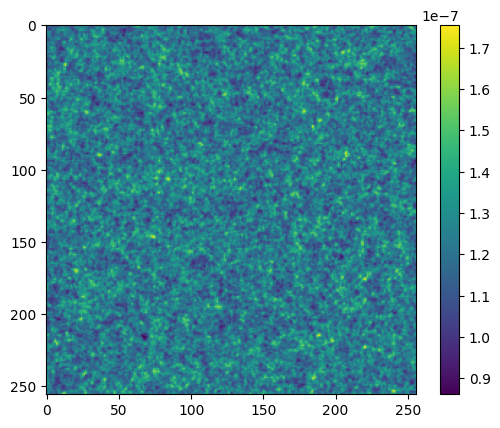

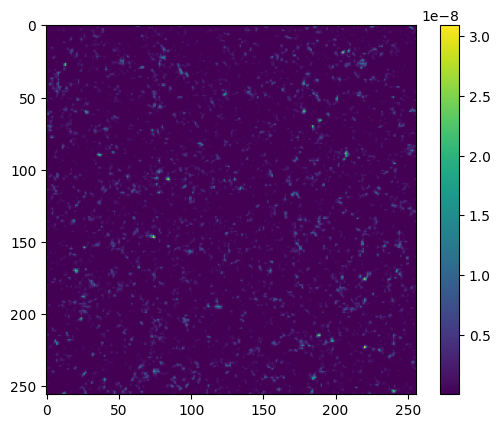

In [67]:
import numpy as np
from matplotlib import pyplot as plt

# Units
mu = 1.989e45       # 10^15 solar masses
lu = 3.085678e19    # 10 kpc
tu = 31557600.0 * 1e6  # 1 mega year

G = 6.6742e-11 * mu * tu**2 / lu**3
c = 299792458.0 * tu / lu
kappa = 8 * np.pi * G / c**4

# Hubble conversion
def H0(H):
    return tu / lu * H

def Lambda(OmegaL, Ho):
    return 3 * OmegaL * H0(Ho)**2 / c**2

# Volume-weighted mean
def gm(X, V):
    return np.sum(X*V)/np.sum(V)

def block_average(array, block=4):
    """
    Reduce a 3D cube by averaging over block^3 cells.
    Input: 1D flattened array of length N^3 + 1
    Output: 1D flattened array of length (N/block)^3
    """
    N = int(round((len(array)-1)**(1/3)))  # N^3 = len(array)-1
    array = array[:-1]  # drop last fake element
    array = array.reshape(N, N, N)
    new_N = N // block
    return array.reshape(new_N, block, new_N, block, new_N, block).mean(axis=(1,3,5)).ravel()



# Get Omegas from a data file
def get_omegas(data, block=4):
    theta = block_average(data["theta"], block=1)
    rho   = block_average(data["rho"], block=1)
    print(f"rho total={np.sum(rho)}")
    sigma = block_average(data["sigma"], block=1)
    V     = block_average(data["V"], block=1)

    # Hubble rate
    H = gm(theta, V)/3

    print("means:",
      "rho", gm(rho,V),
      "sigma²", gm(sigma**2,V),
      "theta²", gm(theta**2,V),
      "H²", H**2)

    # Omega parameters
    Omega_m = gm(rho, V)/(3*H**2)
    Omega_Q = (gm(sigma**2, V) - (1/9)*gm(theta**2, V) + H**2)/H**2
    R = 2*gm(rho, V) + 6*gm(sigma**2, V) - 2/3*gm(theta**2, V)
    Omega_K = -R/(6*H**2)
    Omega_L = 0  # set Lambda to 0

    return Omega_m, Omega_Q, Omega_K, Omega_L, H

# Example usage for a single file
i = 44
initial = np.load(f"./data/jusilun_output/initial_vals_{str(i).zfill(3)}.npz")
final   = np.load(f"./data/jusilun_output/final_vals_{str(i).zfill(3)}.npz")

# Initial
Omega_m, Omega_Q, Omega_K, Omega_L, H = get_omegas(initial)
print(f"Initial (z={initial['z_i']}):")
print(f"Omega_m = {Omega_m:.5f}")
print(f"Omega_Q = {Omega_Q:.5f}")
print(f"Omega_K = {Omega_K:.5f}")
print(f"Omega_L = {Omega_L:.5f}")
print(f"Omega_T = {Omega_m+Omega_Q+Omega_K+Omega_L:.5f}")
print(f"H = {H*lu/tu*c:.5f}\n")

N_grid = 256  # Make sure this matches your simulation
rho_3d = initial["rho"][:-1].reshape(N_grid, N_grid, N_grid)
plt.imshow(rho_3d[:,:,N_grid//2])  # Middle slice
plt.colorbar()

# Final
Omega_m, Omega_Q, Omega_K, Omega_L, H = get_omegas(final)
print(f"Final (z=0):")
print(f"Omega_m = {Omega_m:.5f}")
print(f"Omega_Q = {Omega_Q:.5f}")
print(f"Omega_K = {Omega_K:.5f}")
print(f"Omega_L = {Omega_L:.5f}")
print(f"Omega_T = {Omega_m+Omega_Q+Omega_K+Omega_L:.5f}")
print(f"H = {H*lu/tu*c:.5f}")

N_grid = 256  # Make sure this matches your simulation
rho_3d = final["rho"][:-1].reshape(N_grid, N_grid, N_grid)
plt.figure()
plt.imshow(rho_3d[:,:,N_grid//2])  # Middle slice
plt.colorbar()





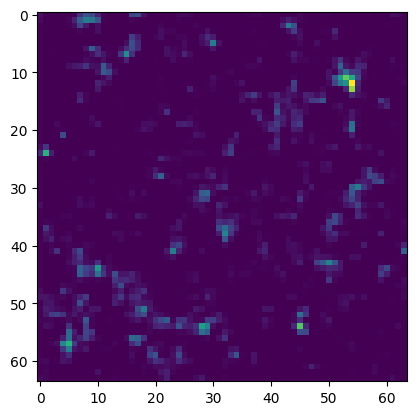

In [70]:
rho_small = rho_3d[0:64, 0:64, 0:64]
plt.imshow(rho_small[:,64//2,:])

Initial (z=90):
Omega_m = 1.00000
Omega_Q = -0.00021
Omega_K = 0.00021
Omega_L = 0.00000
Omega_T = 1.00000
H = 486127.41704

Final (z=0):
Omega_m = 3257.59758
Omega_Q = 3.69231
Omega_K = -3260.28989
Omega_L = 0.00000
Omega_T = 1.00000
H = 364.16751


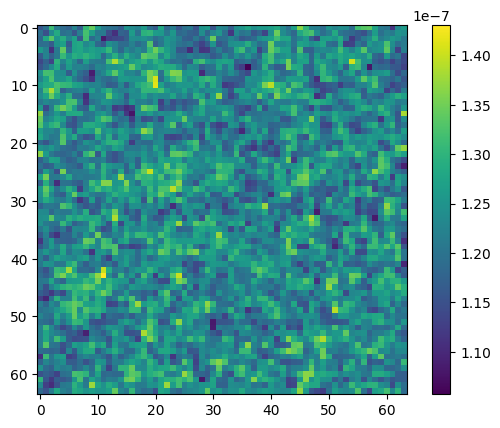

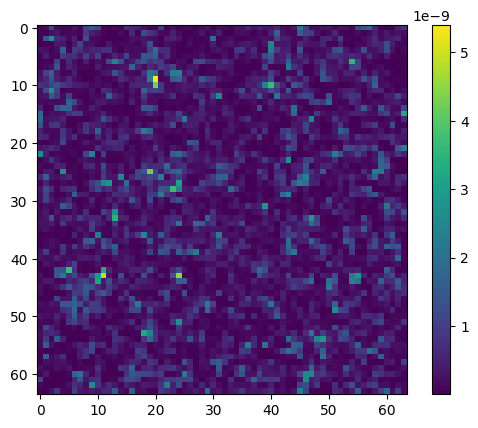

In [61]:
def get_omegas(data, block=4):
    theta = block_average(data["theta"], block=4)*8
    rho   = block_average(data["rho"], block=4)*64
    sigma = block_average(data["sigma"], block=4)
    V     = block_average(data["V"], block=4)
    # Hubble rate
    H = gm(theta, V)/3
    # Omega parameters
    Omega_m = gm(rho, V)/(3*H**2)
    Omega_Q = (gm(sigma**2, V) - (1/9)*gm(theta**2, V) + H**2)/H**2
    R = 2*gm(rho, V) + 6*gm(sigma**2, V) - 2/3*gm(theta**2, V)
    Omega_K = -R/(6*H**2)
    Omega_L = 0  # set Lambda to 0

    return Omega_m, Omega_Q, Omega_K, Omega_L, H

# Example usage for a single file
i = 44
initial = np.load(f"./data/jusilun_output/initial_vals_{str(i).zfill(3)}.npz")
final   = np.load(f"./data/jusilun_output/final_vals_{str(i).zfill(3)}.npz")

# Initial
Omega_m, Omega_Q, Omega_K, Omega_L, H = get_omegas(initial)
print(f"Initial (z={initial['z_i']}):")
print(f"Omega_m = {Omega_m:.5f}")
print(f"Omega_Q = {Omega_Q:.5f}")
print(f"Omega_K = {Omega_K:.5f}")
print(f"Omega_L = {Omega_L:.5f}")
print(f"Omega_T = {Omega_m+Omega_Q+Omega_K+Omega_L:.5f}")
print(f"H = {H*lu/tu*c:.5f}\n")

N_grid = 64  # Make sure this matches your simulation
rho_3d = block_average(initial["rho"], block=4).reshape(N_grid, N_grid, N_grid)
plt.imshow(rho_3d[:,:,N_grid//2])  # Middle slice
plt.colorbar()

# Final
Omega_m, Omega_Q, Omega_K, Omega_L, H = get_omegas(final)
print(f"Final (z=0):")
print(f"Omega_m = {Omega_m:.5f}")
print(f"Omega_Q = {Omega_Q:.5f}")
print(f"Omega_K = {Omega_K:.5f}")
print(f"Omega_L = {Omega_L:.5f}")
print(f"Omega_T = {Omega_m+Omega_Q+Omega_K+Omega_L:.5f}")
print(f"H = {H*lu/tu*c:.5f}")

N_grid = 64  # Make sure this matches your simulation
rho_3d = block_average(final["rho"], block=4).reshape(N_grid, N_grid, N_grid)
plt.figure()
plt.imshow(rho_3d[:,:,N_grid//2])  # Middle slice
plt.colorbar()

Initial (z=90):
Omega_m = 1.00000
Omega_Q = 0.00000
Omega_K = -0.00000
Omega_L = 0.00000
Omega_T = 1.00000
H = 60765.92713

Final (z=0):
Omega_m = 0.33958
Omega_Q = 0.06682
Omega_K = 0.59360
Omega_L = 0.00000
Omega_T = 1.00000
H = 70.00001


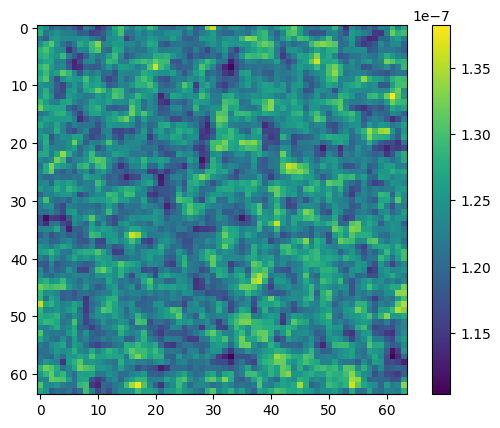

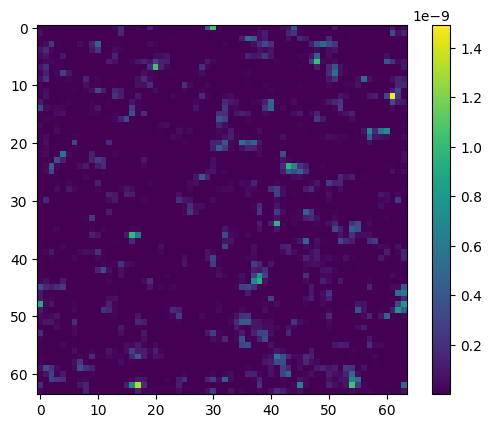

In [5]:
def get_omegas(data, block=4):
    theta = block_average(data["theta"], block=1)
    rho   = block_average(data["rho"], block=1)
    sigma = block_average(data["sigma"], block=1)
    V     = block_average(data["V"], block=1)
    # Hubble rate
    H = gm(theta, V)/3

    # Omega parameters
    Omega_m = gm(rho, V)/(3*H**2)
    Omega_Q = (gm(sigma**2, V) - (1/9)*gm(theta**2, V) + H**2)/H**2
    R = 2*gm(rho, V) + 6*gm(sigma**2, V) - 2/3*gm(theta**2, V)
    Omega_K = -R/(6*H**2)
    Omega_L = 0  # set Lambda to 0

    return Omega_m, Omega_Q, Omega_K, Omega_L, H

# Example usage for a single file
i = 45
initial = np.load(f"./data/jusilun_output/initial_vals_{str(i).zfill(3)}.npz")
final   = np.load(f"./data/jusilun_output/final_vals_{str(i).zfill(3)}.npz")

# Initial
Omega_m, Omega_Q, Omega_K, Omega_L, H = get_omegas(initial)
print(f"Initial (z={initial['z_i']}):")
print(f"Omega_m = {Omega_m:.5f}")
print(f"Omega_Q = {Omega_Q:.5f}")
print(f"Omega_K = {Omega_K:.5f}")
print(f"Omega_L = {Omega_L:.5f}")
print(f"Omega_T = {Omega_m+Omega_Q+Omega_K+Omega_L:.5f}")
print(f"H = {H*lu/tu*c:.5f}\n")

N_grid = 64  # Make sure this matches your simulation
rho_3d = block_average(initial["rho"], block=1).reshape(N_grid, N_grid, N_grid)
plt.imshow(rho_3d[:,:,N_grid//2])  # Middle slice
plt.colorbar()

# Final
Omega_m, Omega_Q, Omega_K, Omega_L, H = get_omegas(final)
print(f"Final (z=0):")
print(f"Omega_m = {Omega_m:.5f}")
print(f"Omega_Q = {Omega_Q:.5f}")
print(f"Omega_K = {Omega_K:.5f}")
print(f"Omega_L = {Omega_L:.5f}")
print(f"Omega_T = {Omega_m+Omega_Q+Omega_K+Omega_L:.5f}")
print(f"H = {H*lu/tu*c:.5f}")

N_grid = 64  # Make sure this matches your simulation
rho_3d = block_average(final["rho"], block=1).reshape(N_grid, N_grid, N_grid)
plt.figure()
plt.imshow(rho_3d[:,:,N_grid//2])  # Middle slice
plt.colorbar()

Initial (z=90):
Omega_m = 1.00000
Omega_Q = 0.00000
Omega_K = -0.00000
Omega_L = 0.00000
Omega_T = 1.00000
H = 60765.92713

Final (z=0):
Omega_m = 0.00461
Omega_Q = 0.06551
Omega_K = 0.92988
Omega_L = 0.00000
Omega_T = 1.00000
H = 70.00000


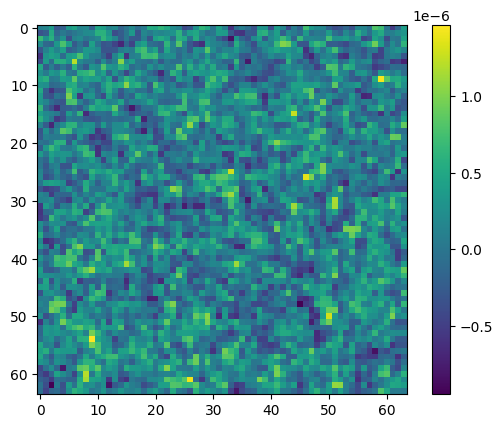

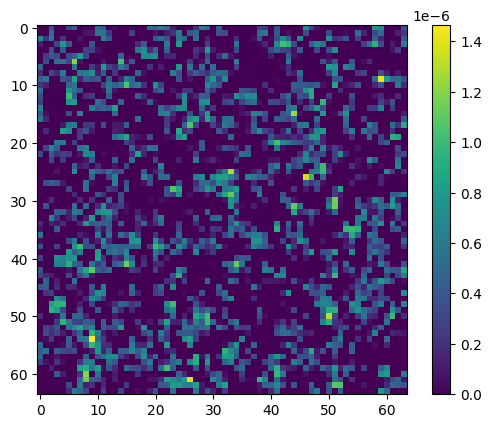

In [46]:
def get_omegas(data, block=4):
    theta = block_average(data["theta"], block=1)
    rho   = block_average(data["rho"], block=1)
    sigma = block_average(data["sigma"], block=1)
    V     = block_average(data["V"], block=1)
    # Hubble rate
    H = gm(theta, V)/3

    # Omega parameters
    Omega_m = gm(rho, V)/(3*H**2)
    Omega_Q = (gm(sigma**2, V) - (1/9)*gm(theta**2, V) + H**2)/H**2
    R = 2*gm(rho, V) + 6*gm(sigma**2, V) - 2/3*gm(theta**2, V)
    Omega_K = -R/(6*H**2)
    Omega_L = 0  # set Lambda to 0

    return Omega_m, Omega_Q, Omega_K, Omega_L, H

# Example usage for a single file
i = 51
initial = np.load(f"./data/jusilun_output/initial_vals_{str(i).zfill(3)}.npz")
final   = np.load(f"./data/jusilun_output/final_vals_{str(i).zfill(3)}.npz")

# Initial
Omega_m, Omega_Q, Omega_K, Omega_L, H = get_omegas(initial)
print(f"Initial (z={initial['z_i']}):")
print(f"Omega_m = {Omega_m:.5f}")
print(f"Omega_Q = {Omega_Q:.5f}")
print(f"Omega_K = {Omega_K:.5f}")
print(f"Omega_L = {Omega_L:.5f}")
print(f"Omega_T = {Omega_m+Omega_Q+Omega_K+Omega_L:.5f}")
print(f"H = {H*lu/tu*c:.5f}\n")

N_grid = 64  # Make sure this matches your simulation
rho_3d = block_average(initial["rho"], block=1).reshape(N_grid, N_grid, N_grid)
plt.imshow(rho_3d[:,:,N_grid//2])  # Middle slice
plt.colorbar()

# Final
Omega_m, Omega_Q, Omega_K, Omega_L, H = get_omegas(final)
print(f"Final (z=0):")
print(f"Omega_m = {Omega_m:.5f}")
print(f"Omega_Q = {Omega_Q:.5f}")
print(f"Omega_K = {Omega_K:.5f}")
print(f"Omega_L = {Omega_L:.5f}")
print(f"Omega_T = {Omega_m+Omega_Q+Omega_K+Omega_L:.5f}")
print(f"H = {H*lu/tu*c:.5f}")

N_grid = 64  # Make sure this matches your simulation
rho_3d = block_average(final["rho"], block=1).reshape(N_grid, N_grid, N_grid)
plt.figure()
plt.imshow(rho_3d[:,:,N_grid//2])  # Middle slice
plt.colorbar()

In [7]:
# diagnostic_coarse_compare.py
import numpy as np

# --- Units (unchanged) ---
mu = 1.989e45
lu = 3.085678e19
tu = 31557600.0 * 1e6
G = 6.6742e-11 * mu * tu**2 / lu**3
c = 299792458.0 * tu / lu
kappa = 8 * np.pi * G / c**4

def gm(X, V):
    X = np.asarray(X, dtype=np.float64)
    V = np.asarray(V, dtype=np.float64)
    return np.sum(X * V) / np.sum(V)

# --- helpers for block ops (drop last fake element if present) ---
def _prepare_flat(a):
    a = np.asarray(a, dtype=np.float64)
    # drop trailing fake element if length-1 is a perfect cube (common file layout)
    if (round((a.size-1)**(1/3)))**3 == a.size-1:
        a = a[:-1]
    N = int(round(a.size**(1/3)))
    if N**3 != a.size:
        raise ValueError(f"Array length {a.size} is not a perfect cube after dropping fake element.")
    return a, N

def block_average_simple(flat, block=4):
    a, N = _prepare_flat(flat)
    if N % block != 0: raise ValueError("N not divisible by block")
    newN = N // block
    arr3 = a.reshape(N, N, N)
    coarse = arr3.reshape(newN, block, newN, block, newN, block).mean(axis=(1,3,5))
    return coarse.ravel(), newN

def block_sum(flat, block=4):
    a, N = _prepare_flat(flat)
    if N % block != 0: raise ValueError("N not divisible by block")
    newN = N // block
    arr3 = a.reshape(N, N, N)
    summed = arr3.reshape(newN, block, newN, block, newN, block).sum(axis=(1,3,5))
    return summed.ravel(), newN

def coarse_rho_and_V_from_mass(rho_flat, V_flat, block=4):
    mass = np.asarray(rho_flat, dtype=np.float64) * np.asarray(V_flat, dtype=np.float64)
    mass_sum, newN = block_sum(mass, block=block)
    V_sum, _ = block_sum(V_flat, block=block)
    eps = 1e-30
    rho_coarse = mass_sum / (V_sum + eps)
    return rho_coarse, V_sum, newN

# --- compute Buchert quantities from arrays (flattened coarse arrays) ---
def compute_buchert_from_flat(theta_flat, rho_flat, sigma_flat, V_flat):
    theta = theta_flat.astype(np.float64)
    rho = rho_flat.astype(np.float64)
    sigma = sigma_flat.astype(np.float64)  # sigma is scalar (sqrt), so sigma**2 used where needed
    V = V_flat.astype(np.float64)
    H = gm(theta, V)/3.0
    sigma2_mean = gm(sigma**2, V)
    theta2_mean = gm(theta**2, V)
    rho_mean = gm(rho, V)
    Q = (2.0/3.0)*(theta2_mean - (gm(theta, V))**2) - 2.0*sigma2_mean
    R = 2.0*rho_mean + 6.0*sigma2_mean - (2.0/3.0)*theta2_mean
    Omega_m = rho_mean / (3.0 * H**2)
    Omega_Q = (sigma2_mean - (1/9)*theta2_mean + H**2)/H**2
    Omega_R = - R / (6.0 * H**2)
    return dict(H=H, H2=H**2, rho_mean=rho_mean, sigma2_mean=sigma2_mean,
                theta2_mean=theta2_mean, Q=Q, R=R,
                Omega_m=Omega_m, Omega_Q=Omega_Q, Omega_R=Omega_R,
                Omega_total=Omega_m + Omega_Q + Omega_R)

# --- main diagnostic runner ---
if __name__ == "__main__":
    # change to your file
    fname = "./data/jusilun_output/final_vals_044.npz"
    data = np.load(fname)

    # Prepare fine arrays (drop fake if present)
    theta_f_raw = np.asarray(data["theta"], dtype=np.float64)
    rho_f_raw   = np.asarray(data["rho"],   dtype=np.float64)
    sigma_f_raw = np.asarray(data["sigma"], dtype=np.float64)
    V_f_raw     = np.asarray(data["V"],     dtype=np.float64)
    # drop last fake if needed
    if (round((theta_f_raw.size-1)**(1/3)))**3 == theta_f_raw.size-1:
        theta_f = theta_f_raw[:-1]; rho_f = rho_f_raw[:-1]; sigma_f = sigma_f_raw[:-1]; V_f = V_f_raw[:-1]
    else:
        theta_f = theta_f_raw; rho_f = rho_f_raw; sigma_f = sigma_f_raw; V_f = V_f_raw

    print("fine: total mass (sum rho*V) =", np.sum(rho_f * V_f), "total vol =", np.sum(V_f))

    # Fine-grid Buchert (baseline)
    fine = compute_buchert_from_flat(theta_f, rho_f, sigma_f, V_f)
    print("\n=== Fine-grid baseline ===")
    for k in ("H","H2","rho_mean","sigma2_mean","theta2_mean","Q","R","Omega_m","Omega_Q","Omega_R","Omega_total"):
        print(f"{k:12s} = {fine[k]:.6e}")

    block = 4
    print(f"\n--- Coarse block = {block} ---")

    # METHOD A: simple_mean (unweighted) for everything (this is what you tried)
    theta_A, newN = block_average_simple(theta_f, block=block)
    rho_A, _     = block_average_simple(rho_f,   block=block)
    sigma_A, _   = block_average_simple(sigma_f, block=block)
    V_A, _       = block_average_simple(V_f,     block=block)
    A = compute_buchert_from_flat(theta_A, rho_A, sigma_A, V_A)
    print("\nMethod A: simple arithmetic mean for all fields (unweighted)")
    print("  mass coarse (sum rho_A * V_A) =", np.sum(rho_A * V_A), "vol coarse (sum V_A) =", np.sum(V_A))
    for k in ("H","H2","rho_mean","sigma2_mean","theta2_mean","Q","R","Omega_m","Omega_Q","Omega_R","Omega_total"):
        print(f"{k:12s} = {A[k]:.6e}")

    # METHOD B: mass_preserving for rho/V; simple mean for theta,sigma (what I earlier recommended)
    theta_B, _ = block_average_simple(theta_f, block=block)
    sigma_B, _ = block_average_simple(sigma_f, block=block)
    rho_B, V_B, newN = coarse_rho_and_V_from_mass(rho_f, V_f, block=block)
    B = compute_buchert_from_flat(theta_B, rho_B, sigma_B, V_B)
    print("\nMethod B: theta,sigma simple mean; rho,V mass-preserving (rho_block = sum(rho*V)/sum(V))")
    print("  mass coarse (sum rho_B * V_B) =", np.sum(rho_B * V_B), "vol coarse (sum V_B) =", np.sum(V_B))
    for k in ("H","H2","rho_mean","sigma2_mean","theta2_mean","Q","R","Omega_m","Omega_Q","Omega_R","Omega_total"):
        print(f"{k:12s} = {B[k]:.6e}")

    # METHOD C: quadratic-first: avg theta^2 and sigma^2 THEN compute Q,R (use mass-preserving for rho & V)
    # Compute fine quadratic fields then block-average them (simple mean)
    theta2_f = theta_f**2
    sigma2_f = sigma_f**2  # sigma is scalar so square to get sigma^2
    theta2_c, _ = block_average_simple(theta2_f, block=block)
    sigma2_c, _ = block_average_simple(sigma2_f, block=block)
    # we need theta_coarse for H: use simple mean (or mass-weighted later)
    theta_c_forH, _ = block_average_simple(theta_f, block=block)
    rho_C, V_C, _ = coarse_rho_and_V_from_mass(rho_f, V_f, block=block)
    # now compute Buchert using theta2_c and sigma2_c (this function expects sigma scalar; adapt below)
    # we create sigma_c_scalar = sqrt(sigma2_c)
    sigma_c_scalar = np.sqrt(sigma2_c)
    # compute (but be careful: compute gm of theta2_c and sigma2_c via gm with V_C)
    C = compute_buchert_from_flat(theta_c_forH, rho_C, sigma_c_scalar, V_C)
    # However compute and show true theta2_mean/sigma2_mean used:
    theta2_mean_C = gm(theta2_c, V_C)
    sigma2_mean_C = gm(sigma2_c, V_C)
    print("\nMethod C: quadratic-first (average theta^2 and sigma^2 over blocks), rho,V mass-preserving")
    print("  mass coarse (sum rho_C * V_C) =", np.sum(rho_C * V_C), "vol coarse (sum V_C) =", np.sum(V_C))
    print("  theta2_mean(block-averaged) =", theta2_mean_C)
    print("  sigma2_mean(block-averaged) =", sigma2_mean_C)
    for k in ("H","H2","rho_mean","sigma2_mean","theta2_mean","Q","R","Omega_m","Omega_Q","Omega_R","Omega_total"):
        print(f"{k:12s} = {C[k]:.6e}")

    # METHOD D: mass-weight block average for theta and sigma (block-average weighted by V) and mass-preserving rho/V
    # We'll compute numerator sum(X*V) and denominator sum(V) per block
    def block_weighted_mean(flat_field, flat_V, block=4):
        mass = np.asarray(flat_field) * np.asarray(flat_V)
        mass_sum, _ = block_sum(mass, block=block)
        V_sum, newN = block_sum(flat_V, block=block)
        return (mass_sum / (V_sum + 1e-30)), newN

    theta_D, _ = block_weighted_mean(theta_f, V_f, block=block)
    sigma_D, _ = block_weighted_mean(sigma_f, V_f, block=block)
    rho_D, V_D, _ = coarse_rho_and_V_from_mass(rho_f, V_f, block=block)
    D = compute_buchert_from_flat(theta_D, rho_D, sigma_D, V_D)
    print("\nMethod D: theta,sigma mass-weighted block mean; rho,V mass-preserving")
    print("  mass coarse (sum rho_D * V_D) =", np.sum(rho_D * V_D), "vol coarse (sum V_D) =", np.sum(V_D))
    for k in ("H","H2","rho_mean","sigma2_mean","theta2_mean","Q","R","Omega_m","Omega_Q","Omega_R","Omega_total"):
        print(f"{k:12s} = {D[k]:.6e}")

    # Finally produce a compact comparison table
    print("\n\n=== Compact comparison table (Omega_m, Omega_Q, Omega_R, Omega_total) ===")
    print("fine   :", f"{fine['Omega_m']:.6e}", f"{fine['Omega_Q']:.6e}", f"{fine['Omega_R']:.6e}", f"{fine['Omega_total']:.6e}")
    print("A mean :", f"{A['Omega_m']:.6e}", f"{A['Omega_Q']:.6e}", f"{A['Omega_R']:.6e}", f"{A['Omega_total']:.6e}")
    print("B mass :", f"{B['Omega_m']:.6e}", f"{B['Omega_Q']:.6e}", f"{B['Omega_R']:.6e}", f"{B['Omega_total']:.6e}")
    print("C quad :", f"{C['Omega_m']:.6e}", f"{C['Omega_Q']:.6e}", f"{C['Omega_R']:.6e}", f"{C['Omega_total']:.6e}")
    print("D wght :", f"{D['Omega_m']:.6e}", f"{D['Omega_Q']:.6e}", f"{D['Omega_R']:.6e}", f"{D['Omega_total']:.6e}")


fine: total mass (sum rho*V) = 2.0678546164789844 total vol = 86425206408742.95

=== Fine-grid baseline ===
H            = 2.334949e-07
H2           = 5.451985e-14
rho_mean     = 2.392652e-14
sigma2_mean  = 3.821749e-15
theta2_mean  = 4.919552e-13
Q            = -6.792466e-15
R            = -2.571866e-13
Omega_m      = 1.462863e-01
Omega_Q      = 6.749671e-02
Omega_R      = 7.862170e-01
Omega_total  = 1.000000e+00

--- Coarse block = 4 ---

Method A: simple arithmetic mean for all fields (unweighted)
  mass coarse (sum rho_A * V_A) = 304.2707202886329 vol coarse (sum V_A) = 1350393850136.6086
H            = 1.518415e-07
H2           = 2.305584e-14
rho_mean     = 2.253200e-10
sigma2_mean  = 5.572576e-12
theta2_mean  = 2.249813e-13
Q            = -1.113350e-11
R            = 4.839254e-10
Omega_m      = 3.257598e+03
Omega_Q      = 2.416148e+02
Omega_R      = -3.498212e+03
Omega_total  = 1.000000e+00

Method B: theta,sigma simple mean; rho,V mass-preserving (rho_block = sum(rho*V)/sum(V))


In [3]:
import numpy as np

values = [0.21 + 0.02 * i for i in range(10)]  # 0.2 → 0.4 inclusive

for _ in range(1):
    for om in values:
        print(round(om, 2))



0.21
0.23
0.25
0.27
0.29
0.31
0.33
0.35
0.37
0.39
